In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os

# return df with year matched
def read_file(yr):
    base_dir = 'data'
    file_yr = str(yr)+'.csv'
    file_path = os.path.join(base_dir, file_yr)
    df = pd.read_csv(file_path)
    
    return df

df_2015 = read_file(2015)
df_2016 = read_file(2016)
df_2017 = read_file(2017)
df_2018 = read_file(2018)
df_2019 = read_file(2019)

In [3]:
# Merge two yr df
Econ_15_18 = pd.merge(df_2015, df_2018, on=['Country'])
Econ_15_18.rename(columns={"Economy (GDP per Capita)": "Econ_15", "GDP per capita": "Econ_18"}
                  , inplace=True)

Econ_15_18['Econ_diff'] = Econ_15_18['Econ_18'] - Econ_15_18['Econ_15']
Econ_15_18.head()

,Country,Region,Happiness Rank,Happiness_Score_x,Standard Error,Econ_15,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Dystopia Residual,Overall rank,Happiness_Score_y,Econ_18,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_y,Perceptions of corruption,Econ_diff
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,0.02349
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2.70201,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,0.04068
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2.49204,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,0.02552
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2.46531,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,-0.00300
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2.45176,7,7.328,1.330,1.532,0.896,0.653,0.321,0.291,0.00371


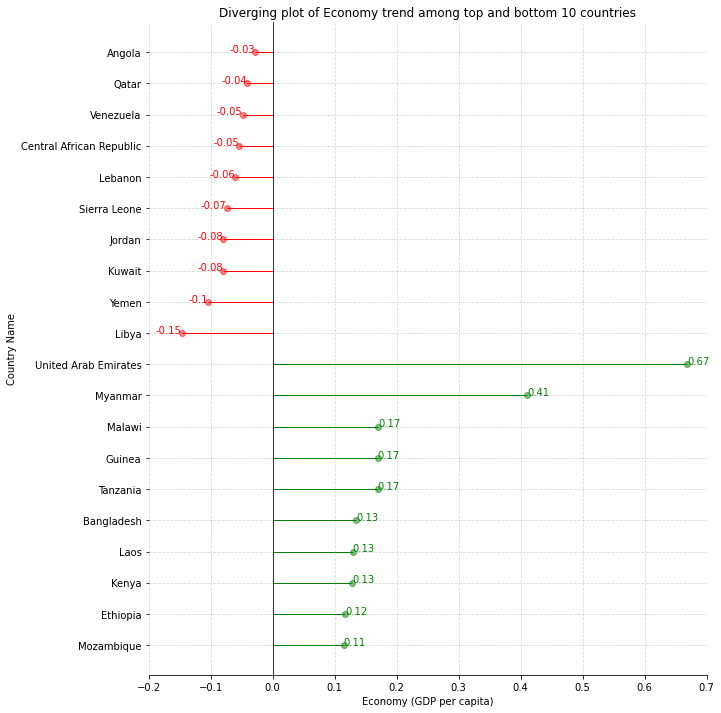

In [4]:
# sort value and reset the index
Econ_15_18.sort_values("Econ_diff", inplace = True)
df_bot10 = Econ_15_18.iloc[:10, :]
df_top10 = Econ_15_18.iloc[-10:, :]
df = pd.concat([df_top10, df_bot10])
df.reset_index(inplace=True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ["red" if x < 0 else "green" for x in df["Econ_diff"]]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot()

# plot horizontal lines that go from zero to the value
# here we make the linewidht very thin.
ax.hlines(y = df.index, xmin = 0 , color = colors,  xmax = df["Econ_diff"], linewidth = 1)

# ----------------------------------------------------------------------------------------------------
# plot the data
# iterate over x and y and annotate text and plot the data
for x, y in zip(df["Econ_diff"], df.index):
    # annotate text
    ax.text(x, 
             y, 
             round(x, 2), 
             color = "red" if x < 0 else "green",  
             horizontalalignment='right' if x < 0 else 'left', 
             size = 10)
    # plot the points
    ax.scatter(x, 
                y, 
                color = "red" if x < 0 else "green", 
                alpha = 0.5)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set title
ax.set_title("Diverging plot of Economy trend among top and bottom 10 countries")
# change x lim
ax.set_xlim(-0.2, 0.7)

# set labels
ax.set_xlabel("Economy (GDP per capita)")
ax.set_ylabel("Country Name")

# make a grid
ax.grid(linestyle='--', alpha=0.5)

# instead of y = 1, 2, 3...
# put the car makers on the y axis
ax.set_yticks(df.index)
ax.set_yticklabels(df.Country)

# change the spines to make it nicer
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")

# with this line, we change the right spine to be in the middle
# as a vertical line from the origin
ax.spines['right'].set_position(('data',0))
ax.spines['right'].set_color('black')
plt.savefig('EDA_1.png')



In [5]:
df_gdp_UAE = pd.read_csv('Data/UAE_GDP.csv')
df_gdp_UAE.head()


,DATE,GDP
0,1975-01-01,1.472067e+10
1,1976-01-01,1.921302e+10
2,1977-01-01,2.487178e+10
3,1978-01-01,2.377583e+10
4,1979-01-01,3.122546e+10


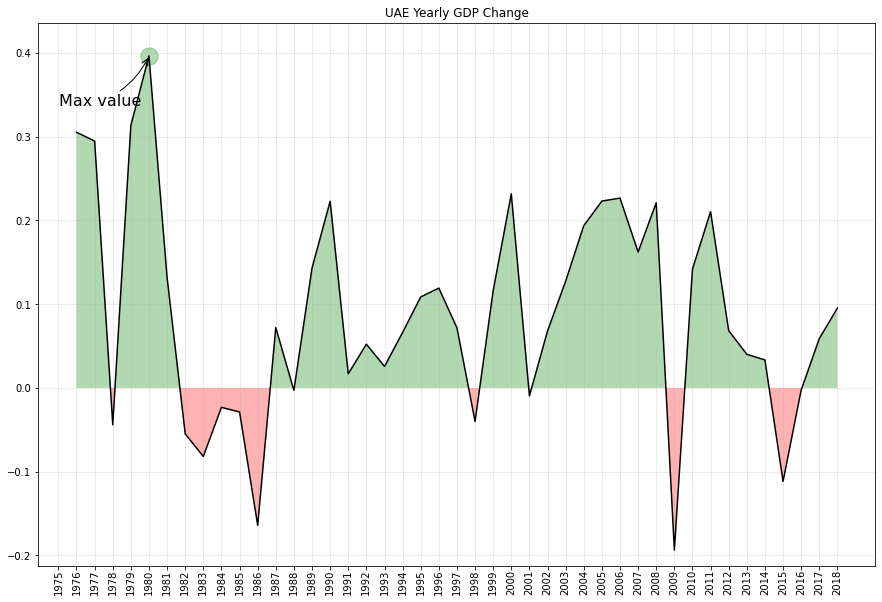

In [6]:
import numpy as np

df_gdp_UAE = pd.read_csv('Data/UAE_GDP.csv')
df_gdp_UAE["gdp_yearly_change"] = (df_gdp_UAE["GDP"] - df_gdp_UAE["GDP"].shift(1))/df_gdp_UAE["GDP"].shift(1)

df = df_gdp_UAE.copy()

# convert todatetime
df["date_converted"] = pd.to_datetime(df["DATE"])


# separate x and y 
x = df["date_converted"]
y = df["gdp_yearly_change"]

# calculate the max values to annotate on the plot
y_max = y.max()

# find the index of the max value
x_ind = np.where(y == y_max)

# find the x based on the index of max
x_max = x.iloc[x_ind]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.plot(x, y, color = "black")
ax.scatter(x_max, y_max, s = 300, color = "green", alpha = 0.3)

# annotate the text of the Max value
ax.annotate(r'Max value',
             xy = (x_max, y_max), 
             xytext = (-90, -50), 
             textcoords = 'offset points', 
             fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2")
           )
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# fill the area with a specific color
ax.fill_between(x, 0, y, where = 0 > y, facecolor='red', interpolate = True, alpha = 0.3)
ax.fill_between(x, 0, y, where = 0 <= y, facecolor='green', interpolate = True, alpha = 0.3)

# change the ylim to make it more pleasant for the viewer
ax.set_ylim(y.min() * 1.1, y.max() * 1.1)

# change the values of the x axis
# extract the first 3 letters of the month
xtickvals = [str(y) for y,m in zip(df.date_converted.dt.year, df.date_converted.dt.month_name())]

# show ticks to be every year
ax.set_xticks(x)

# Change the ticks string format
ax.set_xticklabels(xtickvals, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# add a grid
ax.grid(alpha = 0.3)

# set the title
ax.set_title("UAE Yearly GDP Change")
plt.savefig('EDA_2.png')


In [9]:
from bokeh.plotting import figure, output_file, show,
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper

df_2016 = read_file(2016)
df_2016_proc = df_2016[['Country','Region', 'Happiness_Score', 'Economy_GDP', 'Health (Life Expectancy)', 'Trust (Government Corruption)']]
df_2016_sample = df_2016_proc.loc[df_2016_proc['Region'].isin(['Western Europe', 'North America','Southeastern Asia', 
                                                              'Central and Eastern Europe', 'Eastern Asia'])]

colors = ["#ffb380", "#AA5093", "#ffb3cc", "#50AA77", "#88EF4E"]
index_cmap = factor_cmap('Region', palette = colors, 
                         factors=sorted(df_2016_sample.Region.unique()))

hover = HoverTool(tooltips=[
    ("Country: ", "@Country"),
    ("Economy (GDP):", "@Economy_GDP"),
    ('Happiness_Score: ', '@Happiness_Score'),
])

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(tools=[hover], title="Scatter Plot of GDP & Happiness_Score Index in 2016")

p.scatter('Economy_GDP', 'Happiness_Score',source=df_2016_sample,
          fill_color=index_cmap, size=15,
          legend='Region')

p.xaxis.axis_label = 'Economy_GDP'
p.yaxis.axis_label = 'Happiness_Score'

p.legend.location = "top_left"

# output_file()
#Display figure inline in Jupyter Notebook.
output_notebook()

show(p)  # open a browser

# fig = plt.figure(figsize = (15, 10))
# ax = sns.scatterplot(x="Economy (GDP per Capita)", y="Happiness_Score",
#                       hue="Region", data=df_2016_sample)



TypeError: output_file() missing 1 required positional argument: 'filename'